# AXAI Tutorial

This example shows how one can run our algorithm called AXAI to produce explanations for deep neural networks given a specific input and prediction. In this example, we use a pre-trained ResNet34 from the torchvision library. The DNN was trained on Imagenet and the sample input is an image from the Egyptian Cat class.

### Now, let's begin.

We first import the `AXAI` class and then import other required libraries.

In [1]:
from AXAI import AXAI
import torch
import torchvision.models as models
from PIL import Image
from torchvision import transforms

### Explanation Generation
AXAI has five inputs: a) Model, b) Data, c) Loss criterion of model, d) std of dataset used in preprocessing, and e) mean of dataset used in preprocessing. The explaintion is generated through two lines of code.
<br>
<br>
First, we define the `AXAI` class and name it as `AXExplainer`. The three input arguments are the __blackbox model__, the __input data__, and __loss criterion__ used in the blackbox model. The format of the input data (an image) can be any raw image. One should do the same prepreprocessing based on how the image is fed in ones model. AXAI accepts any types of input include audio and text but here we only showcase an image-based example.
<br>
<br>
`AXExplainer = AXAI(model, inputs, loss_criterion, std, mean)`
<br>
<br>
Then we generate the explanations throught the `.explain()` method in `AXExplainer`. The output of `.explain()` is a tuple containing the __explanations__ and the __original image__. And there you go!
<br>
<br>
`Explanations, original_img = AXExplainer.explain(K=3, kernel_size=8, max_dist=200, ratio=0.2)`
<br>
<br>
The `K` argument is the number of explanable features shown in the final output. `kernel_size`, `max_dist`, and `ratio` are three input parameters of QuickShift.
<br>
<br>

### Some details about the modules in AXAI class
`.pgdm(net, x, y, loss_criterion, alpha, eps, steps, radius, norm)`: Projected Gradient Descent Method (PGDM) (Madry et al., 2017)
<br>
<br>
`.gen_adv()`: This is the routine that generates the adverserial inputs using PGDM.
<br>
<br>
`.tensor2cuda()`: AXAI utilizes the GPU, if GPUs are detected on the machine.
<br>
<br>
`.threshold(diff, percentage)`: As mentoned in our paper, a theshold is defined to filter out unuseful features. This routine performs this task.
<br>
<br>
`.Attack_and_Filter()`: Wraps up `.gen_adv()` and `.threshold()`.
<br>
<br>
`.explain(self, K, kernel_size, max_dist, ratio)`: Performs image segmentation via QuickShift (Vedaldi et al., 2008), and maps the filtered adverserial attacks back to the original image. The `K` argument is the explanation length, i.e., the number of explainable image segments one desires to show. `kernel_size`, `max_dist`, and `ratio` are three input parameters for QuickShift. The user is suggested to explore different variations of the four arguments in the `.explain()` module to produce the best resutls. On how the parameters can affect the final explanations, please refer to our paper.
<br>
<br>
`.denormalize(norm_img)`: Denormalizes the image that is normalized during preprocessing, this is just for showing the explanations wihtout normalization. 
<br>
<br>
`.plotter(Explanations,save_path=None,save=False)`: Plots a side by side image (original image and its corresponding explanation). If `save=True` then the side by side image is saved as a .png file.

In [2]:
#---->Load image and do preprocessing
img_path = 'ILSVRC2012_val_00041427.JPEG'
img = Image.open(img_path)
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
preprocess = transforms.Compose([transforms.Resize((256, 256)),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean, std)])
data = preprocess(img).unsqueeze(0)

#---->Load model and loss criterion used in the model
model = models.resnet34(pretrained=True)
model.eval()
loss_criterion = torch.nn.CrossEntropyLoss()

#---->Generating explanations
AXExplainer = AXAI(model = model,inputs = data,
                    loss_criterion=loss_criterion,std=std,mean=mean)
Explanations, original_img = AXExplainer.explain(K=3, 
                                   kernel_size=8,
                                   max_dist=200, 
                                   ratio=0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


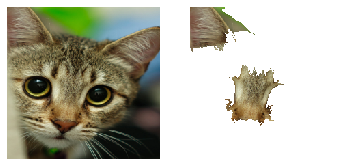

In [3]:
AXExplainer.plotter(Explanations, save_path='./',save=True)

Let's plot the explainations. One can simply use the `.plotter` method in `AXExplainer` to save an image including both the explanation and original image.

One can also manualy plot the explanations with desired plotting tools.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

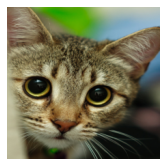

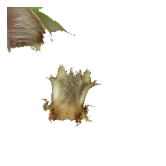

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(original_img)
ax.axis('off')

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(Explanations)
ax.axis('off')
